# Import Libraries

In [1]:
from utils.data import read_image_tfds
import tensorflow_datasets as tfds
import numpy as np
from utils.viz import display_digits_with_boxes, intersection_over_union
import tensorflow as tf
from model.cnn import get_model

/home/khiem/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load Data

In [2]:
dataset = tfds.load("mnist", split="test", as_supervised=True, try_gcs=True)
dataset = dataset.map(read_image_tfds, num_parallel_calls=16)
dataset = dataset.batch(10000, drop_remainder=True)
dataset = dataset.repeat()

# Visualize Data

(10000, 75, 75, 1)
(10000,)
(10000, 4)


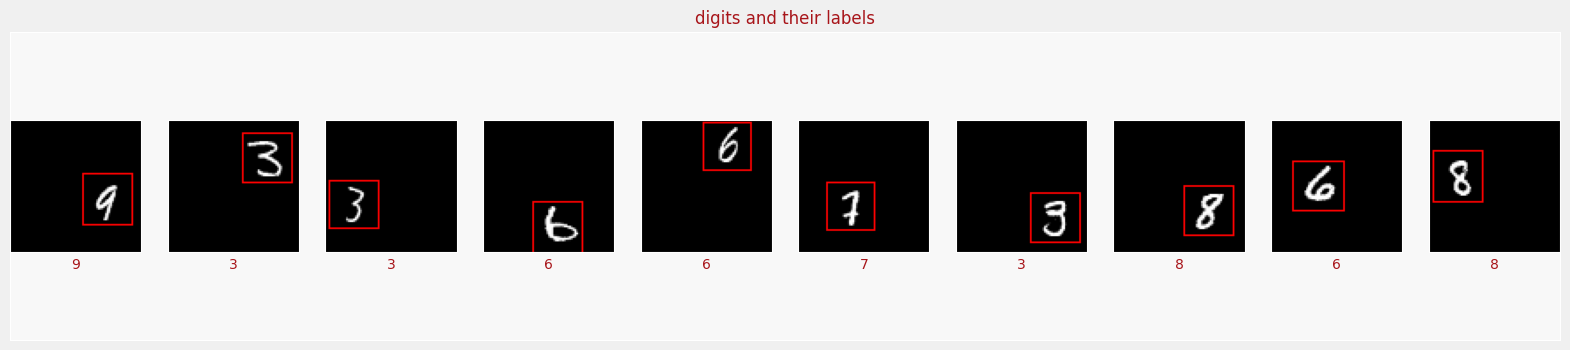

In [3]:
for digits, (labels, bboxes) in dataset:
    digits = digits.numpy()
    labels = labels.numpy()
    bboxes = bboxes.numpy()
    break
labels = np.argmax(labels, axis=1)
print(digits.shape)
print(labels.shape)
print(bboxes.shape)
display_digits_with_boxes(digits, labels, labels, np.array([]), bboxes, np.array([]), "digits and their labels", 0.5)


# Load Model

In [4]:
inputs = tf.keras.layers.Input(shape=(75, 75, 1,))
model = get_model(inputs)
model.load_weights("model/model_2023-02-15_01-44-27.h5")

# Visualize Predictions

In [5]:
predictions = model.predict(digits, batch_size=64)
predicted_labels = np.argmax(predictions[0], axis=1)
predicted_bboxes = predictions[1]
iou = intersection_over_union(predicted_bboxes, bboxes)
iou_threshold = 0.6
print("Number of predictions where iou > threshold(%s): %s" % (iou_threshold, (iou >= iou_threshold).sum()))
print("Number of predictions where iou < threshold(%s): %s" % (iou_threshold, (iou < iou_threshold).sum()))
display_digits_with_boxes(digits, predicted_labels, labels, predicted_bboxes, bboxes, iou, "True and Predicted values", iou_threshold)

157/157 [==============================] - 3s 6ms/step
Number of predictions where iou > threshold(0.6): 8525
Number of predictions where iou < threshold(0.6): 1475


TypeError: display_digits_with_boxes() missing 1 required positional argument: 'iou_threshold'